# Approximation of function

Consider a function on $[1, 15]$:
$f(x) = \sin(x / 5) * \exp(x / 10) + 5 * \exp(-x / 2)$.



In [123]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [124]:
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5*np.exp(-x/2)

In [125]:
x = np.arange(1, 15, 0.1)

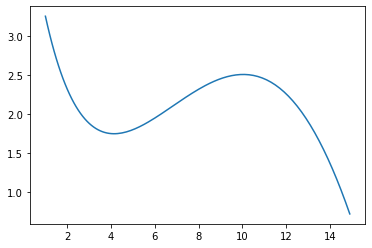

In [126]:
plt.plot(x,f(x))
plt.show()

Turn our attention to the following fact:\
    Exists only one at-most $n$ degree polynomial that passes through $n + 1$ data points.

So for a approximation polynomial we get a system of equations:
   $\begin{cases}
    w_{0} + w_{1}x_{1} + w_{2}x^{2}_{1} + .. + w_{n}x^{n+1}_{1} = f(x_{1}) & \\
    .. & \\
    w_{0} + w_{1}x_{n+1} + w_{2}x^{2}_{n+1} + .. + w_{n}x^{n+1}_{n+1} = f(x_{n+1}) & \\
  \end{cases}$

In [127]:
def make_matrix(values):
    """Support function that helpes to form matrix from given values.
    
    Args:
        values: The list of values(x's).
    Returns:
        The matrix represented by np.array.
    """
    arr = []
    for value in values:
        arr.append([value**x for x in range(len(values))])
    return np.array(arr)

In [128]:
def polynom(x, coeffs):
    """Returns a polynominal with x values for the coeffs provided.
    
    Args:
        x: The array of values.
        coeffs: The array of coefficients.
    """
    res = 0
    for i in range(len(coeffs)):
        res += coeffs[i]*x**i
    return res

In [129]:
def get_coeffs(values):
    """Returns the coefficients of approximation polynomial from given values.
    
    Args:
        values: The list of values(x's).
    Returns:
        The array of coefficients.
    """
    a = make_matrix(values)
    b = np.array([f(v) for v in values])
    
    print(b)
    return linalg.solve(a,b)

Find an approximation first-degree polynomial that coincides with the function at points 1 and 15.

[3.25221687 0.63522142]


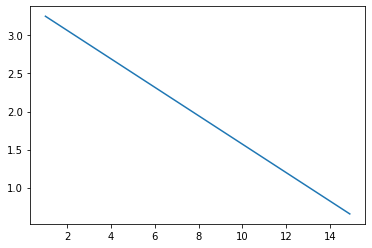

In [130]:
coeffs1 = get_coeffs([1,15])
plt.plot(x, polynom(x, coeffs1))
plt.show()

Find an approximation second-degree polynomial that coincides with the function at points 1, 8 and 15.

[3.25221687 2.31617016 0.63522142]


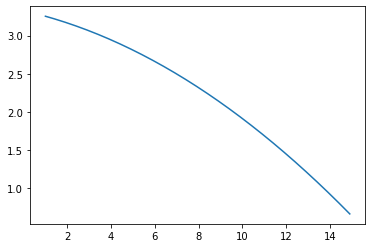

In [131]:
coeffs2 = get_coeffs([1, 8, 15])
plt.plot(x, polynom(x, coeffs2))
plt.show()

Find an approximation third-degree polynomial that coincides with the function at points 1, 4, 10 and 15

[3.25221687 1.74684595 2.50541641 0.63522142]


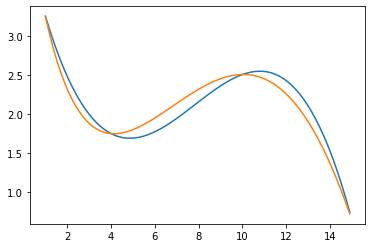

In [141]:
coeffs3 = get_coeffs([1, 4, 10, 15])
plt.plot(x, polynom(x, coeffs3), x, f(x))
plt.show()

In [138]:
out = open('submission-2.txt', 'w')
out.write(" ".join(map(str, coeffs3)))
out.close()

In [140]:
!cat submission-2.txt

4.362641535118072 -1.2955258656948436 0.1933368470215116 -0.008235651173320552